### Knock61: 使用する Data を確認しよう

In [2]:
# 乳癌 Data の読み込み
from sklearn.datasets import load_breast_cancer

load_data = load_breast_cancer()

In [3]:
# DataFrame に格納
import pandas as pd

df = pd.DataFrame(load_data.data, columns=load_data.feature_names)
df['y'] = load_data.target

print(len(df))
print(len(df.columns))
display(df.head())

569
31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# 代表値の出力
tg_df = df[['mean radius', 'mean texture', 'y']]
display(tg_df.describe())

,mean radius,mean texture,y
count,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.627417
std,3.524049,4.301036,0.483918
min,6.981000,9.710000,0.000000
25%,11.700000,16.170000,0.000000
50%,13.370000,18.840000,1.000000
75%,15.780000,21.800000,1.000000
max,28.110000,39.280000,1.000000


In [5]:
# 相関係数の出力
tg_df.corr()

,mean radius,mean texture,y
mean radius,1.000000,0.323782,-0.730029
mean texture,0.323782,1.000000,-0.415185
y,-0.730029,-0.415185,1.000000


In [6]:
# Category 種類数の確認
print(tg_df['y'].unique())

[0 1]


In [7]:
# Category 比率の確認
print(len(tg_df.loc[tg_df['y'] == 0]))
print(len(tg_df.loc[tg_df['y'] == 1]))

212
357


- Category の比率に大きな偏りがある Data は不均衡な Data と呼ばれ、放置すると Model の評価や学習に影響が与えられるので注意。
- 学習において、機械学習の Algorithm は学習の Process で多数派 Category を重視する傾向がある。そのため、不均衡 Data を扱う場合の対処法として
    - 少数派 Category の予測に失敗したときは Penalty を大きくする学習 Process に対する Approach.<br><br>
    - 少数派 Category の Data を人工的に増やす（Up-Sampling)
    - 多数派 Category の Data を人工的に減らす (Down-Sampling)
といった Data-set に対する Approach がある。

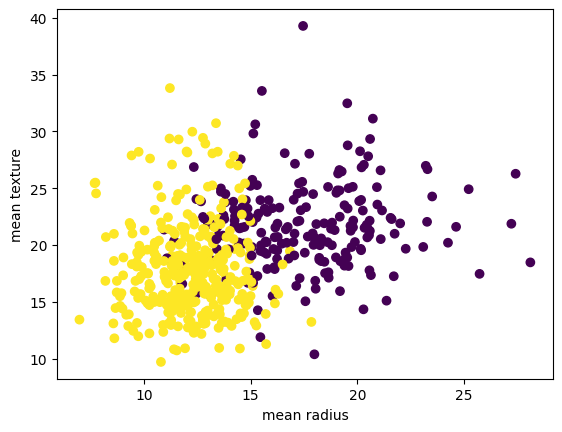

In [8]:
# Data の可視化
import matplotlib.pyplot as plt

plt.scatter(tg_df['mean radius'], tg_df['mean texture'], c=tg_df['y'])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

### Knock62: Data を加工しよう

In [9]:
# 目的変数と説明変数の分割
X = tg_df[['mean radius', 'mean texture']]
y = tg_df['y']

display(X.head())
display(y.head())

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [10]:
# Data-set を訓練用と Test 用に分割する
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

398


,mean radius,mean texture
478,11.490,14.59
303,10.490,18.61
155,12.250,17.94
186,18.310,18.58
101,6.981,13.43


171


,mean radius,mean texture
512,13.40,20.52
457,13.21,25.25
439,14.02,15.66
298,14.26,18.17
37,13.03,18.42


In [11]:
# Data の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled[:3])
print(X_test_scaled[:3])

[[-0.74998027 -1.09978744]
 [-1.02821446 -0.1392617 ]
 [-0.53852228 -0.29934933]]
[[-0.17715788  0.22140254]
 [-0.23403396  1.26339611]
 [ 0.00843776 -0.84922934]]


### Logistic回帰 Model を構築しよう
#### Logistic回帰
- 回帰分析の Process を経て分類予測を行なうため「回帰」と名前についているが分類で使用される Algorithm.
- 重み付けされた説明変数の和から、一方に分類される「確率」を算出し、閾値（50%）を上回るかどうかで最終的な分類を決定する。

In [12]:
# Logistic回帰 Model の構築
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [13]:
# 予測値の出力
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5])

[1 1 1 0 1]
[1 1 1 1 1]


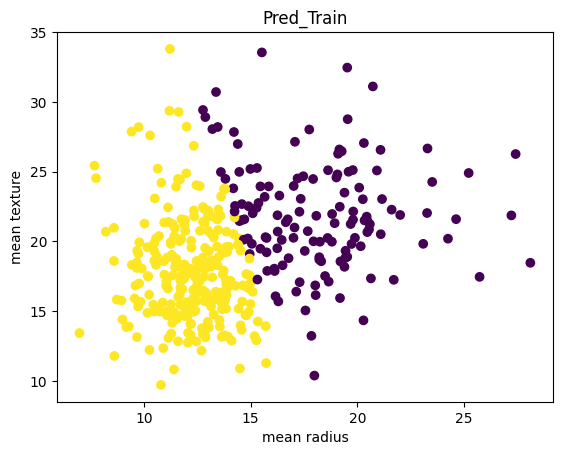

In [14]:
# 予測値の可視化（訓練 Data）
plt.scatter(X_train['mean radius'], X_train['mean texture'], c=y_train_pred)
plt.title('Pred_Train')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

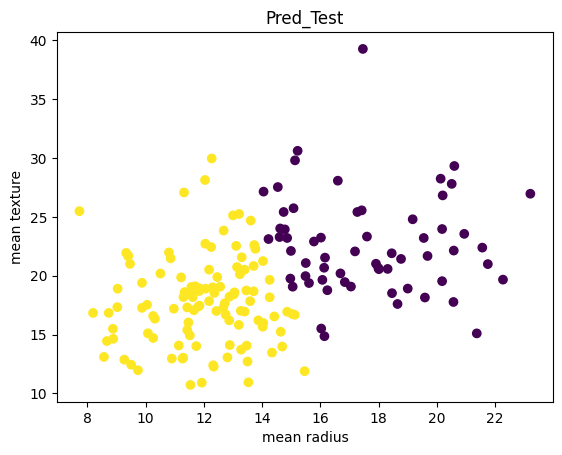

In [15]:
# 予測値の可視化（Test data）
plt.scatter(X_test['mean radius'], X_test['mean texture'], c=y_test_pred)
plt.title('Pred_Test')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

### Knock64: Logistic回帰 Model の決定境界を可視化してみよう
#### 決定境界
Data の分類予測の基準となる境界線のこと

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


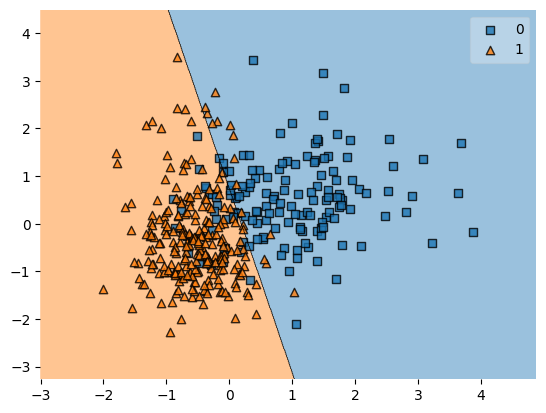

In [16]:
# 決定境界の可視化（Logistic回帰 Model）
import numpy as np
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=log_reg)
plt.show()

- Logistic回帰は Data をざっくりと直線で分類（線形分離）できる Case に適した Algorithm.
※直線という制約上、決定境界周辺では正しく分類できない。
- 他の Algorithm と比較して単純かつ計算 Cost が低いといった特徴もある。

### Knock65: 線形SVM Model を構築し、決定境界を可視化してみよう
#### 線形SVM (Support Vector Machine)
大まかに線形分離できる Case で高い Performance を発揮する。

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


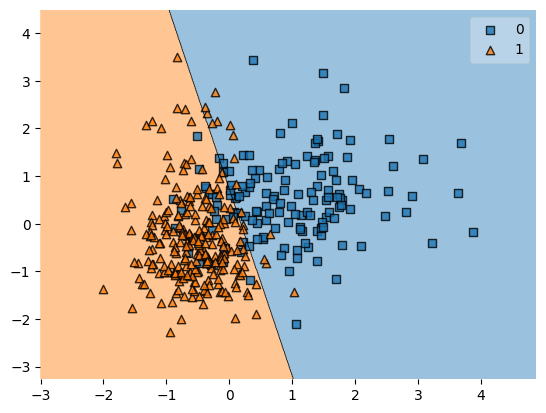

In [17]:
# 線形SVM Model の構築および決定境界の可視化
from sklearn.svm import LinearSVC

liner_svm = LinearSVC(random_state=0).fit(X_train_scaled, y_train)

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=liner_svm)
plt.show()

#### Logistic回帰と線形SVM の使い分け Point
- 線形SVM は Logistic回帰と比べて Data の外れ値の影響を受けにくい。
- SVM は非線形の分類も行なうことができ、Category が入り組んで散布している Data では、非線形SVM を用いた方がうまく分類できることも多い。

### Knock66: Kernel SVM Model を構築し、決定境界を可視化してみよう
SVM は Kernel法という手法を用いることで、線形分離できない Data も分類することができるようになる。
#### Kernel法
線形分離できない Data を線形分離できる手法状態に変換する手法。

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


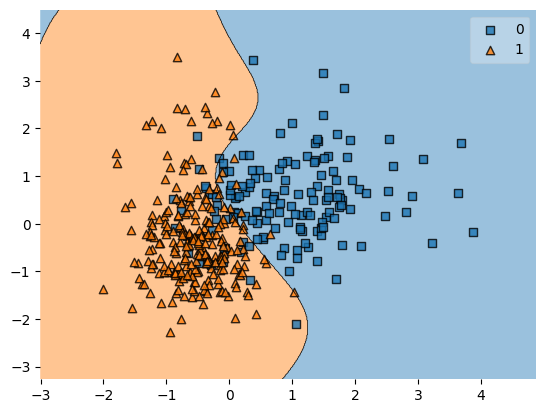

In [18]:
# Kernel SVM model の構築および決定境界の可視化
from sklearn.svm import SVC

kernel_svm = SVC(random_state=0).fit(X_train_scaled, y_train)


plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kernel_svm)
plt.show()

SVM の精度は `C=` や `gamma` などの Hyper-Parameter に大きく依存する。

### Knock67: K 近傍法 Model を構築し、決定境界を可視化してみよう
#### K 近傍法
予測対象 Data の分類予測の結果を、「周辺にある K個の訓練 Data がどちらに分類されているのか」の多数決で決定する。
- 特別な計算をして傾向を導き出すのではなく、単純に教師 Data を丸暗記している。
- **怠惰学習** という学習 Approach になる

In [19]:
#k 近傍法 Model の構築
from sklearn.neighbors import KNeighborsClassifier

kn_cls = KNeighborsClassifier(n_neighbors=5, p=2).fit(X_train_scaled, y_train)
# n_neighbors= : 予測時に見る訓練 Data の数 の指定
# p= : 距離指標の指定 => 1: Euclid距離, 2: Manhattan距離

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


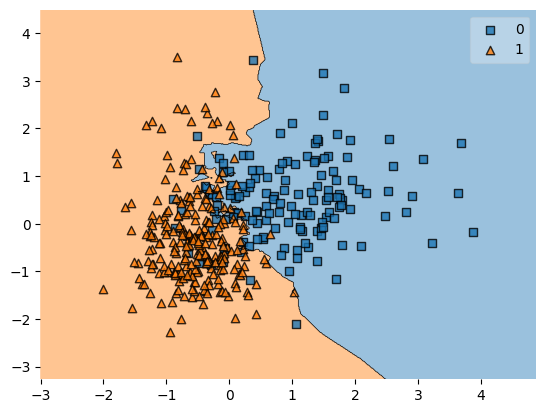

In [20]:
# 決定境界の可視化（k近傍法 Model)
plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kn_cls)
plt.show()

K近傍法
- 「暗記した教師 Data を予測時に参照する」という特徴から学習は高速で終わるが予測には時間を要する。
- 訓練Data の数が多くなるほど、予測に要する時間が長くなる傾向がある。
- 計算Cost が高くなりやすい一方で、Model の解釈が容易かつ、どのような Data にも比較的柔軟に対応できる。

### Knock68: 決定木 Model を構築し、決定境界を可視化してみよう
#### 決定木
- Model の解釈性に優れている
- 過学習に陥りやすい

In [21]:
# 決定木 Model の構築する
from sklearn.tree import DecisionTreeClassifier

tree_cls = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


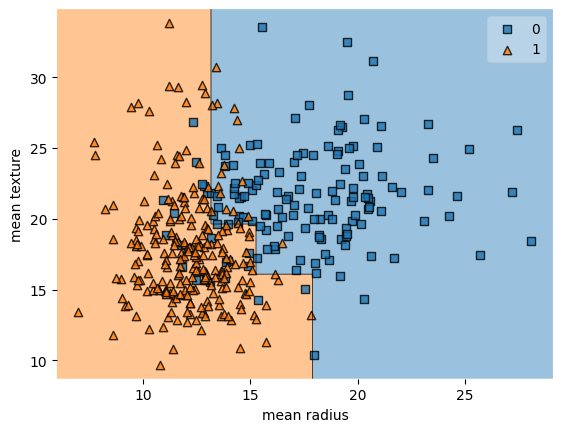

In [22]:
# 決定境界の可視化（決定木 Model）
plot_decision_regions(np.array(X_train), np.array(y_train), clf=tree_cls)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

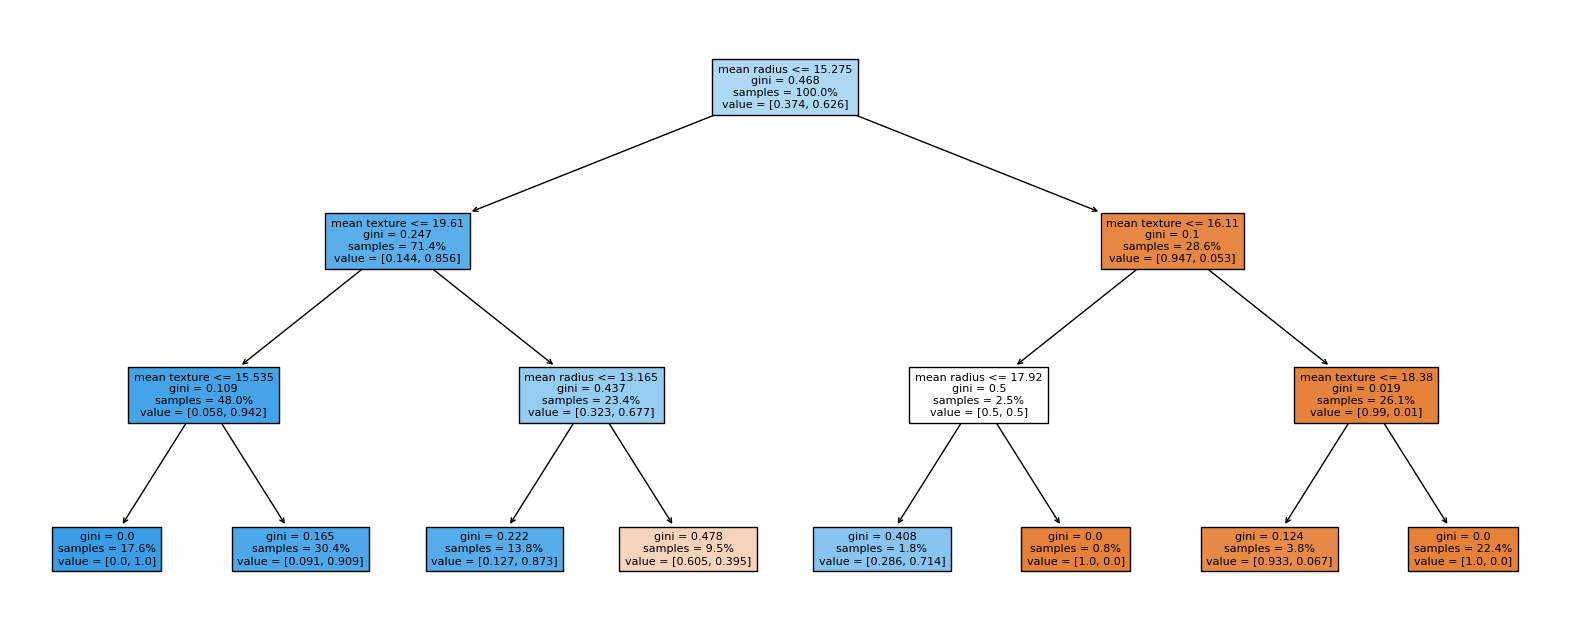

In [23]:
# 決定木の可視化
from sklearn import tree

plt.figure(figsize=(20, 8))
tree.plot_tree(tree_cls, feature_names=['mean radius', 'mean texture'], filled=True, proportion=True, fontsize=8)
plt.show()

- 決定木を可視化することで、「どのような条件でどの Category に分類されるのか」が説明可能になる。
- Business の現場で機械学習Model を使った意思決定を行なう場合は、予測結果の根拠が求められることが多いため、解釈性が高い Algorithm は重宝されやすい。
- 決定木は過学習に陥りやすいなど、精度面の課題がある。

### Knock69: Random-Forest Model を構築し、決定境界を可視化してみよう
#### Random-Forest
複数の異なる決定木を生成し、それから予測結果を総合的に判断する Algorithm
- 分類では、各決定木の結果の多数決で予測値を決定する。
- 単一の決定木と比較して、Model の解釈性は劣るものの、過学習を抑えられ、精度の向上が期待できる。

In [24]:
# Random-Forest Model の構築
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

Ensemble学習を行なう Algorithm は、SVM や決定木に比べて、Hyper-Parameter tuning をそれほど Severe に行なわくても、ある程度高い精度が出やすい

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


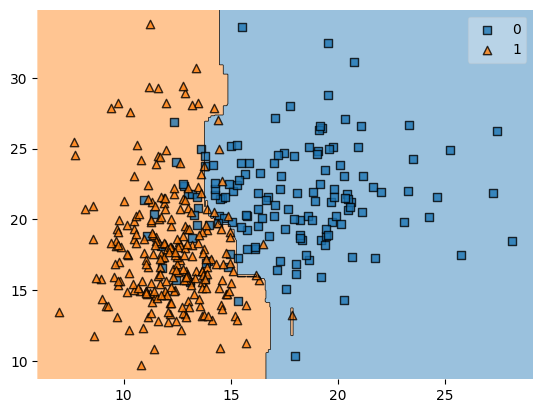

In [26]:
# 決定境界を可視化（Random-Forest）
plot_decision_regions(np.array(X_train), np.array(y_train), clf=rf_cls)
plt.show()

Random-Forest では複数の決定木の結果をもとに分類予測を行なうため、単一の決定木と比較して、複雑な決定境界が引かれる。

### Knock70: 線形分離できない Data を分類してみよう

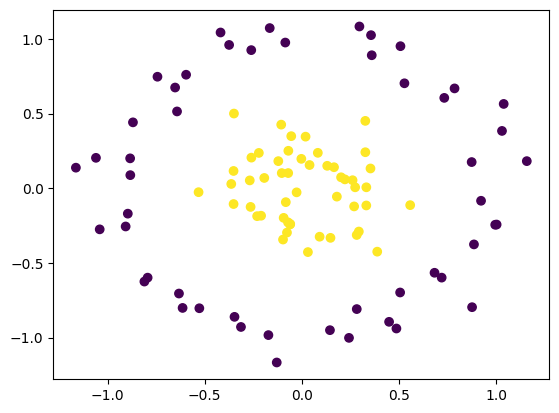

In [27]:
# 円形 Data の生成
from sklearn.datasets import make_circles

X_circle, y_circle = make_circles(random_state=42, n_samples=100, noise=0.1, factor=0.3)

plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle)
plt.show()

In [35]:
# 複数 Model の定義
models = {'Logistic Regressions': LogisticRegression(),
          'Linear SVM': LinearSVC(random_state=0),
          'Kernel SVM': SVC(random_state=0),
          'K Neighbors': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=0),
          'Random Forest': RandomForestClassifier(max_depth=3, random_state=0)}

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/home/tera/.local/share/virtualenvs/ai_model_b

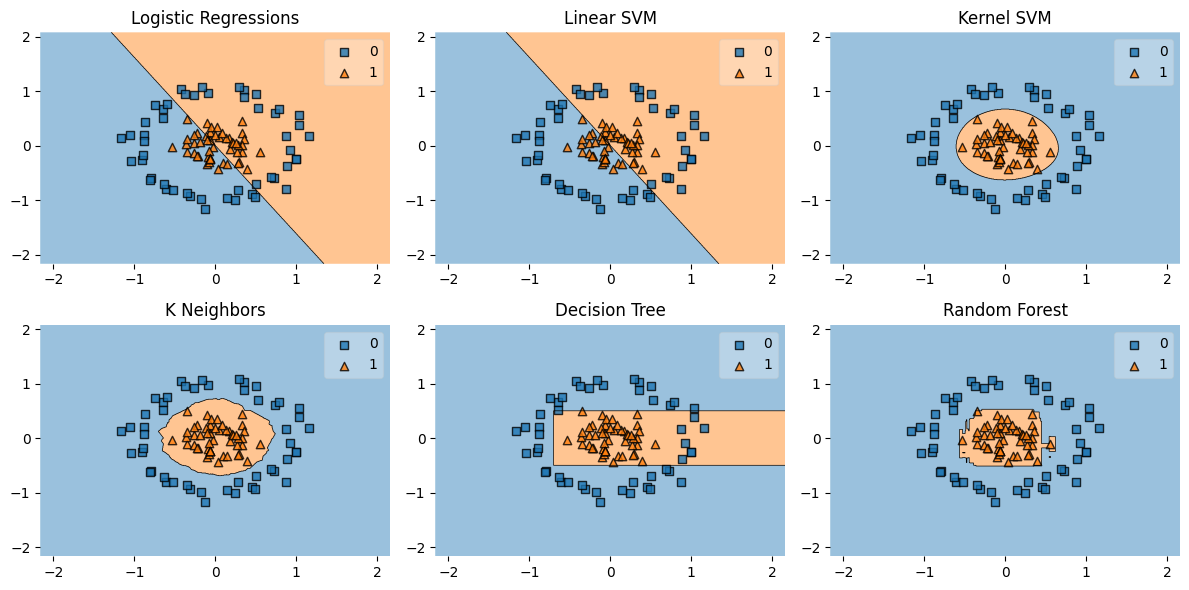

In [36]:
# 一括での Model 構築および決定境界の可視化
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(12, 6))

for model_name, num in zip(models.keys(), itertools.product([0, 1, 2], repeat=2)):

    model = models[model_name].fit(X_circle, y_circle)
    ax = plt.subplot(gs[num[0], num[1]])
    fig = plot_decision_regions(X_circle, y_circle, clf=model)
    plt.title(model_name)

plt.tight_layout()
plt.show()

- 線形系Algorithm では、今回の Data-set に対応できていない。
- Algorithm を選択する時は、まず初めに線形分離できそうか、Data-set の散布状況に目を配る必要がある。